In [ ]:
#importing all the required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator
from ucimlrepo import fetch_ucirepo, list_available_datasets
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import tree


In [ ]:
##importing the data
breast_cancer_wisconsin_original = fetch_ucirepo(id=15)

In [ ]:
#Collecting the features and targets from the dataset
X = breast_cancer_wisconsin_original.data.features
X['class'] = breast_cancer_wisconsin_original.data.targets

C:\Users\Diraj\AppData\Local\Temp\ipykernel_18264\663813602.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['class'] = breast_cancer_wisconsin_original.data.targets


In [ ]:
#printing the instances and attributes
print('Number of instances = %d' % (X.shape[0]))
print('Number of attributes = %d' % (X.shape[1]))
X.head(10)

Number of instances = 699
Number of attributes = 10


,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2
5,8,10,10,8,7,10.0,9,7,1,4
6,1,1,1,1,2,10.0,3,1,1,2
7,2,1,2,1,2,1.0,3,1,1,2
8,2,1,1,1,2,1.0,1,1,5,2
9,4,2,1,1,2,1.0,2,1,1,2


In [ ]:
#finding the missing values
print('Number of missing values:')
for col in X.columns:
    print('\t%s: %d' % (col,X[col].isna().sum()))

Number of missing values:
	Clump_thickness: 0
	Uniformity_of_cell_size: 0
	Uniformity_of_cell_shape: 0
	Marginal_adhesion: 0
	Single_epithelial_cell_size: 0
	Bare_nuclei: 16
	Bland_chromatin: 0
	Normal_nucleoli: 0
	Mitoses: 0
	class: 0


In [ ]:
## replacing the missing values by median
X['Bare_nuclei'].fillna(X['Bare_nuclei'].median(),inplace=True)

C:\Users\Diraj\AppData\Local\Temp\ipykernel_18264\40020401.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Bare_nuclei'].fillna(X['Bare_nuclei'].median(),inplace=True)


In [ ]:
data = X.drop(['class'],axis=1)

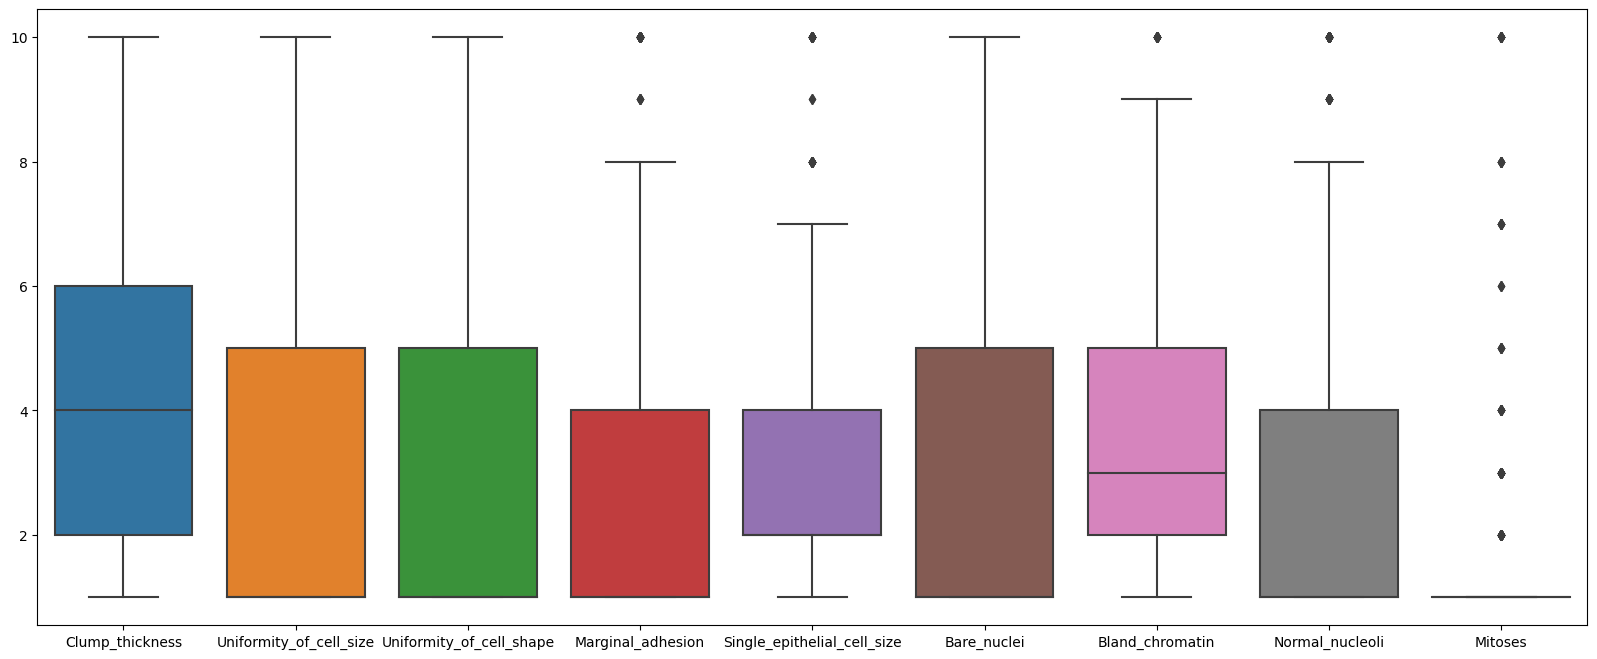

In [ ]:
#visualizing the data to find the outliers
plt.figure(figsize=(20,8))
sns.boxplot(data)
plt.show()

In [ ]:
## dealing with the outliers
Z = (data-data.mean())/data.std()
Z[20:25]

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
20,0.917080,-0.044070,-0.406284,2.519152,0.805662,1.798376,0.640688,0.371049,1.405526
21,1.982519,0.611354,0.603167,0.067638,1.257272,0.970088,1.460910,2.335921,-0.343666
22,-0.503505,-0.699494,-0.742767,-0.632794,-0.549168,-0.686488,-0.589645,-0.611387,-0.343666
23,1.272227,0.283642,0.603167,-0.632794,-0.549168,-0.686488,1.460910,0.043570,-0.343666
24,-1.213798,-0.699494,-0.742767,-0.632794,-0.549168,-0.686488,-0.179534,-0.611387,-0.343666


In [ ]:
## Discarding the outliers
print('Number of rows before discarding outliers = %d' % (Z.shape[0]))

Z2 = Z.loc[((Z > -3).sum(axis=1)==9) & ((Z <= 3).sum(axis=1)==9),:]
print('Number of rows after discarding outliers = %d' % (Z2.shape[0]))

Number of rows before discarding outliers = 699
Number of rows after discarding outliers = 648


In [ ]:
# finding the duplicate values
d = data.duplicated()
print('Number of duplicate rows = %d' % (d.sum()))

Number of duplicate rows = 242


In [ ]:
## Discarding the duplicates values
print('Number of rows before discarding duplicates = %d' % (X.shape[0]))
data2 = X.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (data2.shape[0]))

Number of rows before discarding duplicates = 699
Number of rows after discarding duplicates = 457


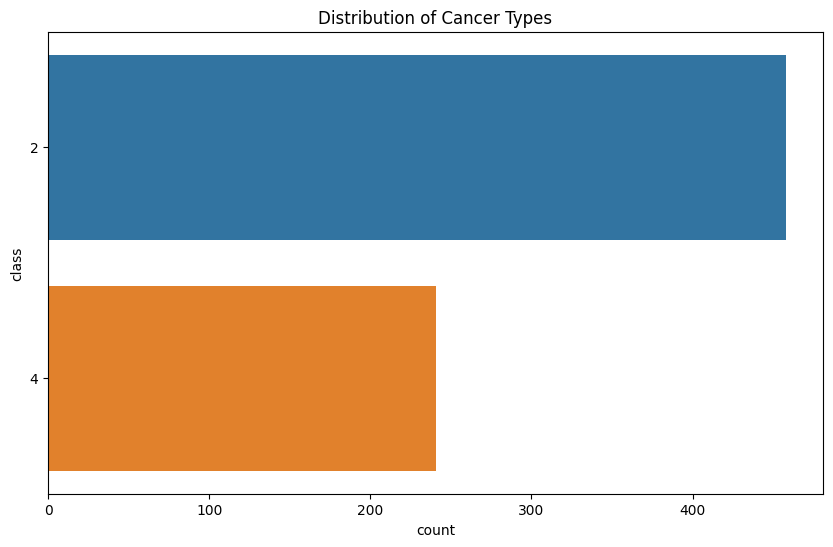

In [ ]:
##plotting the target column
plt.figure(figsize=(10, 6))
sns.countplot(y='class', data=X)
plt.title('Distribution of Cancer Types')
plt.show()

<Figure size 1000x1500 with 0 Axes>

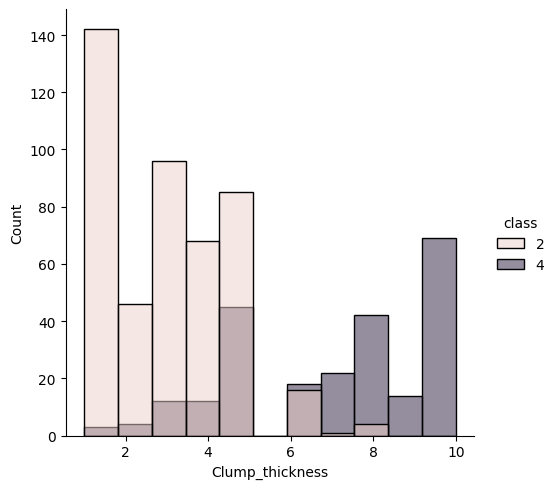

In [ ]:
plt.figure(figsize=(10,15))
sns.displot(X, x="Clump_thickness", hue="class")
plt.show()

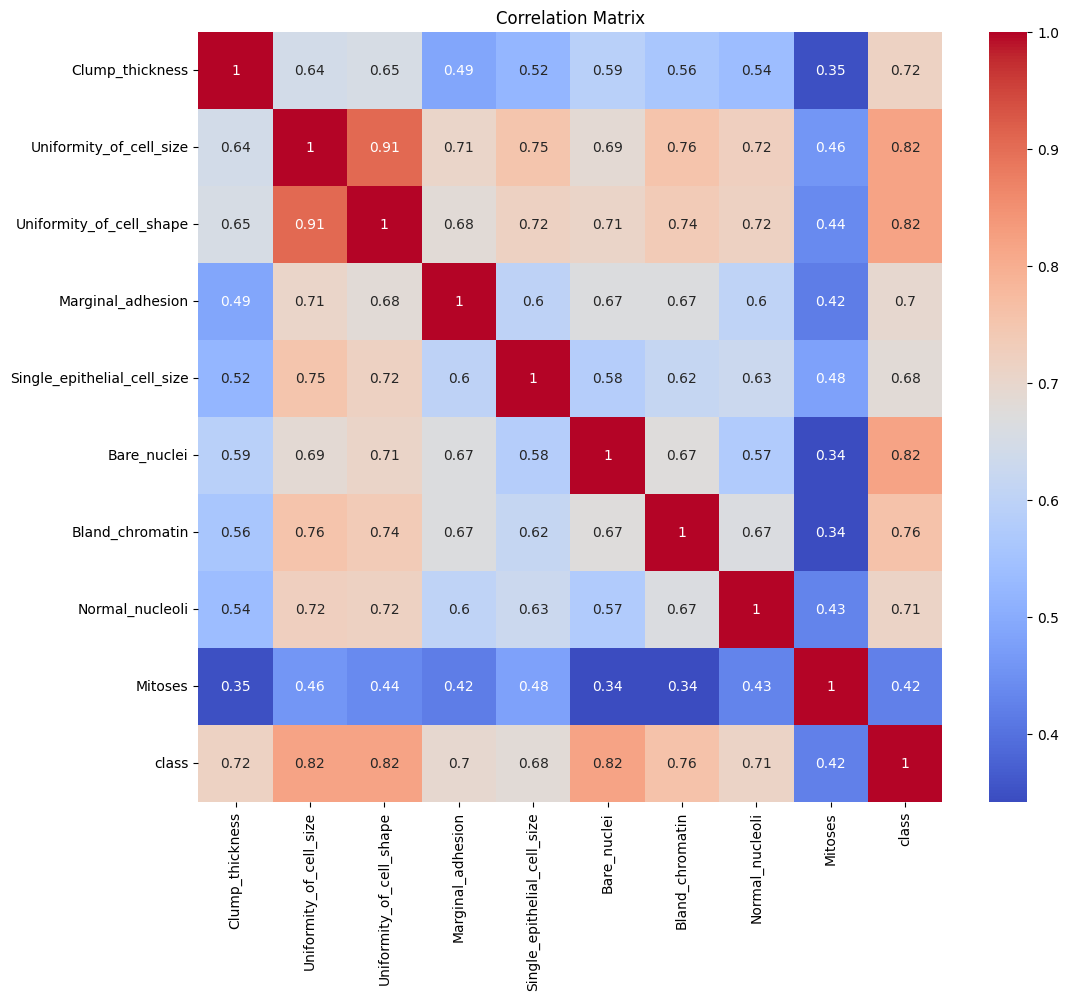

In [ ]:
# Correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data=X.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

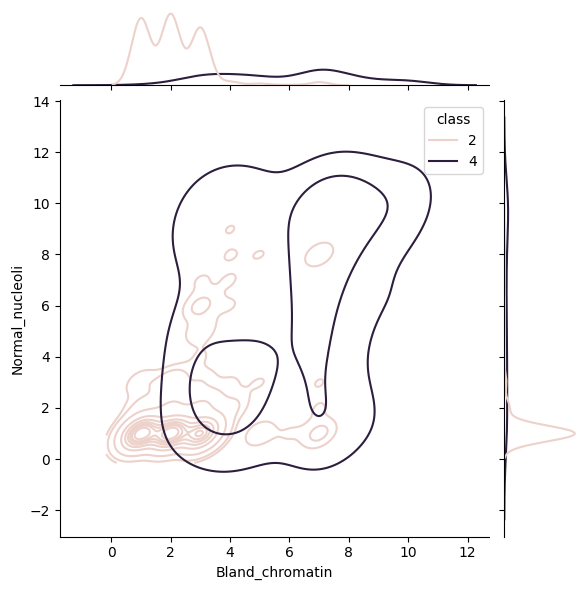

In [ ]:
### Create a joint plot
sns.jointplot(data=X, x="Bland_chromatin", y="Normal_nucleoli", hue="class",
    kind="kde")
plt.show()

In [ ]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(X, test_size=0.2, random_state=42)

# Define the structure of the Bayesian Network
model = BayesianModel([
    ('Clump_thickness', 'Uniformity_of_cell_size'),
    ('Clump_thickness', 'Uniformity_of_cell_shape'),
    ('Uniformity_of_cell_size', 'Marginal_adhesion'),
    ('Uniformity_of_cell_size', 'Single_epithelial_cell_size'),
    ('Uniformity_of_cell_shape', 'Bare_nuclei'),
    ('Bare_nuclei', 'Bland_chromatin'),
    ('Bare_nuclei', 'Normal_nucleoli'),
    ('Bland_chromatin', 'Mitoses'),
    ('Bare_nuclei', 'class')
])

# Fit the model with the training data using Maximum Likelihood Estimator
model.fit(train_data, estimator=MaximumLikelihoodEstimator)

# Perform inference on the test data
inference = model.predict(test_data.drop(columns=['class']))

# Evaluate accuracy
accuracy = accuracy_score(test_data['class'], inference['class'])
print(f'Accuracy: {accuracy:.2f}')




  0%|          | 0/109 [00:00<?, ?it/s]

Accuracy: 0.91


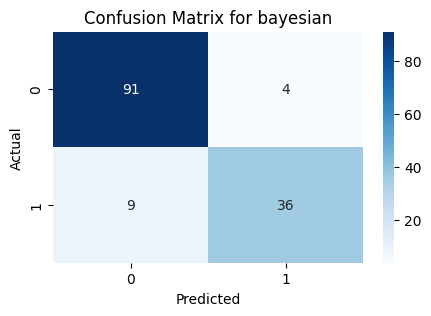

In [ ]:
## calculating and plotting the confusion matrix

con = confusion_matrix(test_data['class'], inference)

plt.figure(figsize=(5, 3))
sns.heatmap(con, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for bayesian')
plt.show()

In [ ]:
TN, FP, FN, TP = con.ravel()

# Calculate sensitivity and specificity
sensitivity_BN = TP / (TP + FN)
specificity_BN = TN / (TN + FP)

print(sensitivity_BN)
print(specificity_BN)

0.8
0.9578947368421052


In [ ]:
x = X.iloc[:,:-1]
y = X.iloc[:,-1]


In [ ]:
# Split the data into training and testing sets

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=2)

In [ ]:
sc=StandardScaler()

In [ ]:
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
model = DecisionTreeClassifier(random_state=42)

In [ ]:
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
pred=model.predict(x_test)

In [ ]:
accuracy_score(y_test,pred)

0.9314285714285714

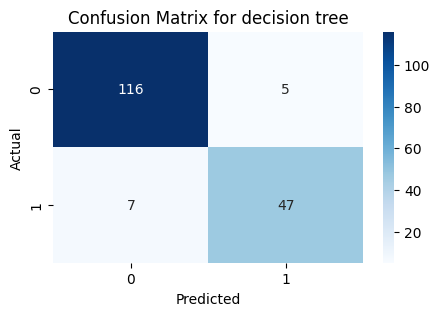

In [ ]:
## calculating and plotting the confusion matrix

conf = confusion_matrix(y_test, pred)


plt.figure(figsize=(5, 3))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for decision tree')
plt.show()

In [ ]:
TN, FP, FN, TP = conf.ravel()

# Calculate sensitivity and specificity
sensitivity_DT = TP / (TP + FN)
specificity_DT = TN / (TN + FP)

print(sensitivity_DT)
print(specificity_DT)

0.8703703703703703
0.9586776859504132


In [ ]:
classifier=RandomForestClassifier(n_estimators=20,criterion='entropy',random_state=2)

In [ ]:
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=2)

In [ ]:
y_pred=classifier.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9485714285714286

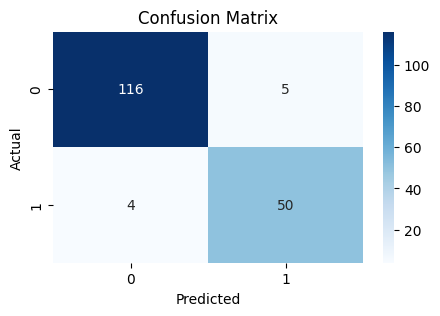

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
TN, FP, FN, TP = conf_mat.ravel()

# Calculate sensitivity and specificity
sensitivity_RF = TP / (TP + FN)
specificity_RF = TN / (TN + FP)

print(sensitivity_RF)
print(specificity_RF)

0.9259259259259259
0.9586776859504132


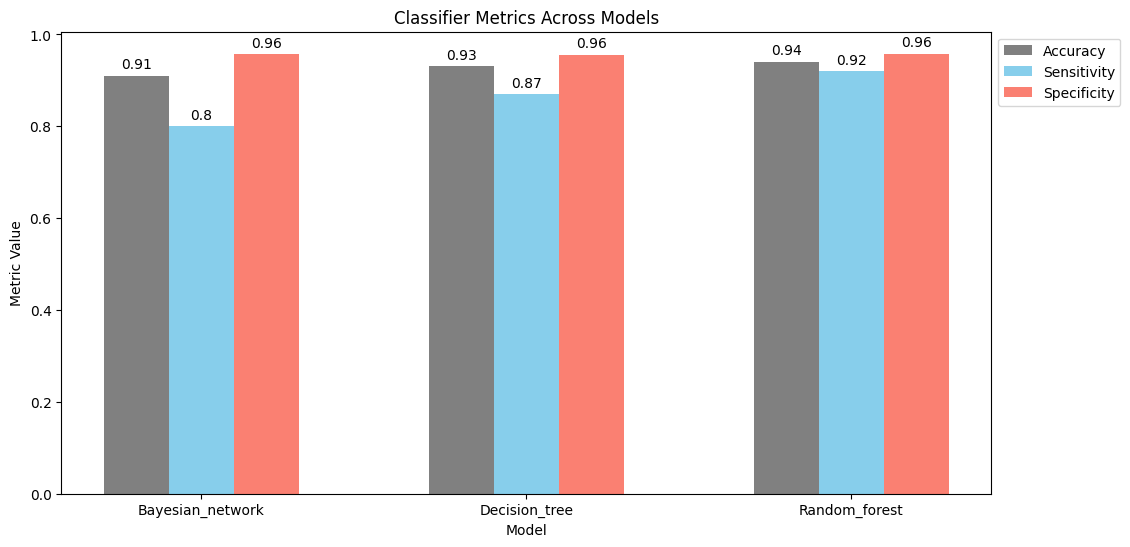

In [ ]:
model_names = ['Bayesian_network', 'Decision_tree', 'Random_forest']
Accuracy = [0.91, 0.93, 0.94]
sensitivity_values = [0.8, 0.87, 0.92]
specificity_values = [0.957, 0.956, 0.958]

bar_width = 0.2  # Width of the bars
index = np.arange(len(model_names))  # The label locations

# Plotting metrics for each model
fig, ax = plt.subplots(figsize=(12, 6))
bar1 = ax.bar(index - bar_width, Accuracy, bar_width, label='Accuracy', color='grey')
bar2 = ax.bar(index, sensitivity_values, bar_width, label='Sensitivity', color='skyblue')
bar3 = ax.bar(index + bar_width, specificity_values, bar_width, label='Specificity', color='salmon')

# Adding labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Metric Value')
ax.set_title('Classifier Metrics Across Models')
ax.set_xticks(index)
ax.set_xticklabels(model_names)
ax.legend(loc='best', bbox_to_anchor=(1, 1))

# Display the values on top of the bars
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)
autolabel(bar3)

plt.show()
